# Startup Transformation
In this project, you’ll work as a data analyst for a tech startup that is looking to improve its operations after a global pandemic has taken the world by storm.

You will apply data transformation techniques to make better sense of the company’s data and help answer important questions such as:

- Is the company in good financial health?
- Does the company need to let go of any employees?
- Should the company allow employees to work from home permanently?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
financial_data = pd.read_csv('financial-data.csv')
financial_data

,Month,Revenue,Expenses
0,1,1420000,510000
1,2,1200000,532000
2,3,1050000,551000
3,4,920000,612000
4,5,807000,628000
5,6,720000,644000


In [3]:
financial_data.dtypes

Month       int64
Revenue     int64
Expenses    int64
dtype: object

## Analyzing Revenue and Expenses 

In [4]:
month = financial_data['Month']
revenue = financial_data['Revenue']
expenses = financial_data['Expenses']

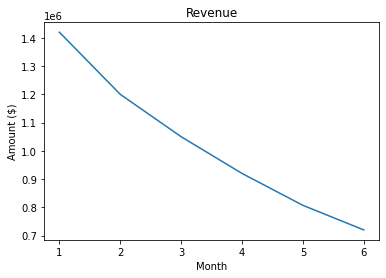

In [5]:
# plot of revenue over the past six months

plt.plot(month, revenue)
plt.title('Revenue')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.show()

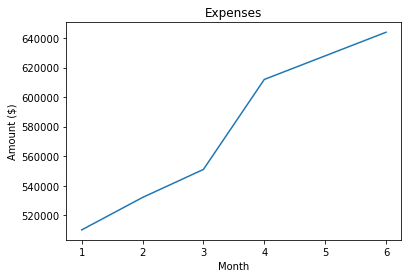

In [6]:
# plot of monthly expenses

plt.clf()
plt.plot(month, expenses)
plt.title('Expenses')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.show()

As shown, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk.

### Pie Chart and Collapsing Categories 

In [7]:
expense_overview = pd.read_csv('expenses.csv')
expense_overview

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03
5,Supples,0.01
6,Food,0.01


In [8]:
expense_overview.dtypes

Expense        object
Proportion    float64
dtype: object

In [9]:
expense_categories = expense_overview['Expense']
proportion = expense_overview['Proportion']

Text(0.5, 1.0, 'Expense Categories')

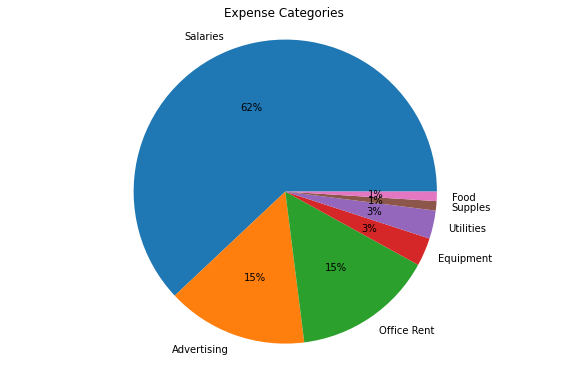

In [10]:
# pie chart for expenses proportion

plt.figure(figsize=(8,5))
plt.pie(proportion, labels = expense_categories, autopct='%d%%', normalize=True)
plt.axis('equal')
plt.tight_layout()
plt.title('Expense Categories')

all categories making up less than 5% of the overall expenses (Equipment, Utilities, Supplies, and Food) are collapsed into an “Other” category

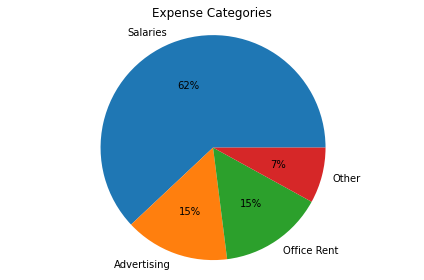

In [12]:
# manually collapsing the category
expense_categories = ['Salaries', 'Advertising', 'Office Rent', 'Other']
proportions = [0.62, 0.15, 0.15, 0.08]
plt.clf()
plt.pie(proportions, labels=expense_categories, autopct='%d%%', normalize=False)
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()

### Employee Productivity 

Salaries make up 62% of expenses. The management team determines that to cut costs in a meaningful way, they must let go of some employees.

In [13]:
employees = pd.read_csv('employees.csv')
employees.head()

,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40
3,Krystal Homeyer,186643,24.36,42.06
4,Kiana Wishart,167148,4.08,25.58


In [14]:
employees.dtypes

Name             object
Salary            int64
Productivity    float64
Commute Time    float64
dtype: object

In [15]:
# Sort the employees data frame (in ascending order) by the Productivity
sorted_data = employees.sort_values(by=['Productivity'])
sorted_data.head()

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39
178,Lilia Lemoine,167579,1.67,27.36
162,Hilma Laughton,85506,1.79,36.41


The company decides to let go of the 100 least productive employees.

In [16]:
employees_cut = sorted_data.head(100)
employees_cut

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39
178,Lilia Lemoine,167579,1.67,27.36
162,Hilma Laughton,85506,1.79,36.41
189,Lucia Schipper,75085,1.88,38.15
251,Elvera Robison,130974,1.93,55.02
32,Flossie Barnard,66000,2.82,27.33
254,Ta Thrasher,104456,3.02,25.53
168,Kirstie Sauers,65824,3.05,49.56


### Commute Times and Log Transformation

The COO (Chief Operating Officer) is debating whether to allow employees to continue to work from home post-pandemic.

In [17]:
commute_times = employees_cut['Commute Time']
commute_times.describe()

count    100.000000
mean      35.233000
std       16.648631
min       10.860000
25%       22.457500
50%       32.910000
75%       44.847500
max       98.500000
Name: Commute Time, dtype: float64

- What are the average and median commute times? (Average 35, median 32)
- Might it be worth it for the company to explore allowing remote work indefinitely so employees can save time during the day?

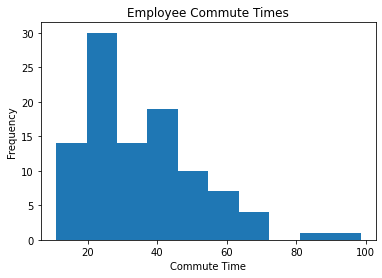

In [18]:
# explore the shape of the commute time data using a histogram

plt.clf()
plt.hist(commute_times)
plt.title('Employee Commute Times')
plt.xlabel('Commute Time')
plt.ylabel('Frequency')
plt.show()

The data seems to be skewed to the right. To make it more symmetrical, we might try applying a log transformation.

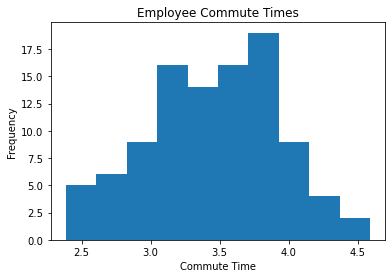

In [19]:
commute_times_log = np.log(commute_times)

plt.clf()
plt.hist(commute_times_log)
plt.title('Employee Commute Times')
plt.xlabel('Commute Time')
plt.ylabel('Frequency')
plt.show()

Notice how the shape of the data changes from being right skewed to a more symmetrical (and even slightly left-skewed) in shape. After applying log transformation, the transformed data is more “normal” than before.

### Extra 

- Apply standardization to the employees data using StandardScaler() from sklearn. Refer to this article if you need help.

In [22]:
income_productivity = employees[['Salary', 'Productivity']]
income_productivity.head()

,Salary,Productivity
0,87902,29.91
1,95672,49.91
2,177864,78.00
3,186643,24.36
4,167148,4.08


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(income_productivity)
print(normalized_data)

[[0.34447106 0.29873899]
 [0.39112344 0.49889912]
 [0.88461792 0.78002402]
 [0.93732851 0.24319456]
 [0.82027727 0.04023219]
 [0.14630954 0.24009207]
 [0.60304651 1.        ]
 [0.3087943  0.64281425]
 [0.21398851 0.52722178]
 [0.02322412 0.94265412]
 [0.55905398 0.45586469]
 [0.35817257 0.72257806]
 [0.48310127 0.55994796]
 [0.07296264 0.81895516]
 [0.69306098 0.60708567]
 [0.07662518 0.29023219]
 [0.62573626 0.12610088]
 [0.12497073 0.51341073]
 [0.22934116 0.30364291]
 [0.87430277 0.84147318]
 [0.57778698 0.75690552]
 [0.74081813 0.93644916]
 [0.07650509 0.38901121]
 [0.39046298 0.99679744]
 [0.55307383 0.57776221]
 [0.38269359 0.11969576]
 [0.4819845  0.5968775 ]
 [0.03226039 0.98939151]
 [0.8047505  0.38891113]
 [0.83937052 0.94315452]
 [0.27837719 0.08096477]
 [0.13168939 0.84227382]
 [0.2129678  0.0276221 ]
 [0.14546295 0.53192554]
 [0.05148573 0.92574059]
 [0.01571891 0.27872298]
 [0.2949607  0.26230985]
 [0.65772046 0.15642514]
 [0.32769542 0.38901121]
 [0.51213742 0.79413531]


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(income_productivity)
print(standardized_data)

[[-0.49164752 -0.74247673]
 [-0.33157069 -0.03800953]
 [ 1.3617414   0.95141466]
 [ 1.54260556 -0.93796638]
 [ 1.14097135 -1.65229613]
 [-1.17159292 -0.94888563]
 [ 0.39559428  1.72562412]
 [-0.61406407  0.46850239]
 [-0.93936821  0.06167258]
 [-1.59393206  1.52379427]
 [ 0.2446441  -0.18946998]
 [-0.44463397  0.74923258]
 [-0.01597005  0.17685297]
 [-1.42326584  1.08843354]
 [ 0.7044581   0.342755  ]
 [-1.41069868 -0.77241659]
 [ 0.4734489  -1.3500797 ]
 [-1.24481211  0.01306434]
 [-0.88668913 -0.72521729]
 [ 1.32634732  1.1676861 ]
 [ 0.30892205  0.8700487 ]
 [ 0.86832568  1.50195579]
 [-1.41111072 -0.42476202]
 [-0.3338369   1.71435265]
 [ 0.2241246   0.23955055]
 [-0.36049577 -1.37262265]
 [-0.01980201  0.30682717]
 [-1.56292618  1.68828736]
 [ 1.08769481 -0.42511426]
 [ 1.20648542  1.52555544]
 [-0.71843334 -1.50893706]
 [-1.22175857  1.17050397]
 [-0.94287053 -1.69667757]
 [-1.17449779  0.07822756]
 [-1.49695887  1.46426679]
 [-1.61968444 -0.81292346]
 [-0.66153086 -0.87068977]
 

- Explore the income and productivity features in more detail. Can you find a relationship between productivity and income?

In [27]:
employees['Salary'].min()

30530

In [28]:
employees['Salary'].max()

197081

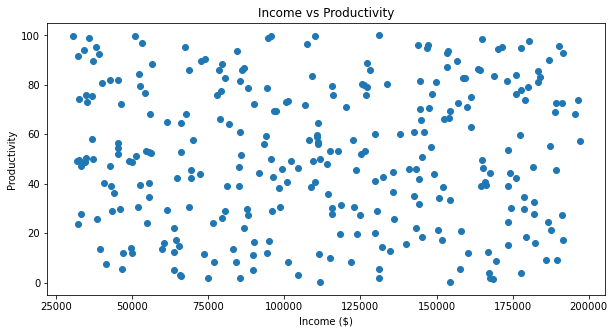

In [29]:
# scatter plot of Income and productivity

plt.figure(figsize=(10,5))
plt.scatter(x=employees['Salary'], y=employees['Productivity'])
plt.title('Income vs Productivity')
plt.xlabel('Income ($)')
plt.ylabel('Productivity')
plt.show()

Income and productivity has no association. More income employees get, doesn't mean has higher productivity.